In [57]:

#import necessary libraries
import os
import sys
import time

import requests
import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [31]:
#import the data
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')


In [32]:

#missing values
missing_values=Test.isnull().sum()
print(missing_values)

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64


In [33]:

#define df
df = pd.concat([Train, Test], axis=0, sort=False)#combine the two datasets

In [34]:
#check the first few rows of the data
print(Train.head())


          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...               

In [35]:

print(Test.head())

          ID         country age_group        travel_with  total_female  \
0     tour_1       AUSTRALIA     45-64             Spouse           1.0   
1   tour_100    SOUTH AFRICA     25-44  Friends/Relatives           0.0   
2  tour_1001         GERMANY     25-44  Friends/Relatives           3.0   
3  tour_1006          CANADA    24-Jan  Friends/Relatives           2.0   
4  tour_1009  UNITED KINGDOM     45-64  Friends/Relatives           2.0   

   total_male               purpose     main_activity  \
0         1.0  Leisure and Holidays  Wildlife tourism   
1         4.0              Business  Wildlife tourism   
2         0.0  Leisure and Holidays     Beach tourism   
3         0.0  Leisure and Holidays  Cultural tourism   
4         2.0  Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_food  \
0  Travel, agent, tour operator     Package Tour  ...          Yes   
1       Tanzania Mission Abroad     Package Tour  ...           No

In [36]:

#check the shape of the data
print(Train.shape)

(4809, 23)


In [37]:
print(Test.shape)

(1601, 22)


In [38]:

#check the data types of the columns
print(Test.dtypes)

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
payment_mode              object
first_trip_tz             object
most_impressing           object
dtype: object


In [39]:

#check for missing values 
print(Test.isnull().sum())

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64


In [40]:
# processed test data



In [41]:
print(df.shape)

(6410, 23)


In [42]:

#check the data types of the columns
df.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [43]:

#check for missing values
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

#
Missing Values data preprocessing;

1.'travel_with':

> This is a categorical variable indicating who the tourist is traveling with
 we can replace missing values with a new category such as 'Unknown'
 to retain the information that the data is missing.

2.'total_female' and 'total_male':

> These variables represent counts of females and males in the tourist group.
 Since the number of missing values is small compared to the total dataset size,
 we can impute the missing values with the median of each respective column.

3.'most_impressing':

> This column represents what impressed the tourist the most during the trip.
 We can replace missing values with a new category like 'Not specified'
 to retain the information that data is missing.

4.'total_cost':

> This is our target variable. Rows with missing 'total_cost' cannot be used for training our model.
 Therefore, we will need to remove these rows from the training dataset.

In [44]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing'
Train['travel_with'].fillna('Unknown', inplace=True)
Train['total_female'].fillna(Train['total_female'].median(), inplace=True)
Train['total_male'].fillna(Train['total_male'].median(), inplace=True)
Train['most_impressing'].fillna('Not specified', inplace=True)

# Step 2: Removing rows with missing 'total_cost' (target variable)
Train.dropna(subset=['total_cost'], inplace=True)

# Check if missing values are handled
#print("Missing values in the training dataset after handling:")
#print(Train.isnull().sum())


In [45]:
#check for missing values
Train.isnull().sum()


ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [46]:

#check for missing values
Test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [48]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing' in the test set
Test['travel_with'].fillna('Unknown', inplace=True)
Test['total_female'].fillna(Test['total_female'].median(), inplace=True)
Test['total_male'].fillna(Test['total_male'].median(), inplace=True)
Test['most_impressing'].fillna('Not specified', inplace=True)

# Check if missing values are handled in the test set
print("Missing values in the test dataset after handling:")
print(Test.isnull().sum())


Missing values in the test dataset after handling:
ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64



# Our new data is free of any missing values

In [50]:

df.describe()#summary statistics of the data

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,6406.000000,6403.000000,6410.000000,6410.000000,4.809000e+03
mean,0.926475,1.021396,8.551326,2.352106,8.114389e+06
std,1.259615,1.183960,13.391914,4.818184,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,664.000000,174.000000,9.953288e+07


In [51]:

#check for duplicates
df.duplicated().sum()

0

In [52]:

# Check for unique values in the 'country' column
df['country'].nunique()


118

we have tourist from 118 countries.

>we ascertain country is a key variable in our dataset as expenditure will
 be not linearly distributed due to different purchasing power amongst different visitors.
 

In [53]:
# Check the data types of each column
print("Data types of each column:")
print(Train.dtypes)

# Identify categorical variables
categorical_cols = Train.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)





Data types of each column:
ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

Categorical columns: Index(['ID', 'country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 

In [54]:

# Check the cardinality of each categorical variable
for col in categorical_cols:
    print("\nUnique values in", col, ":", Train[col].nunique())



Unique values in ID : 4809

Unique values in country : 105

Unique values in age_group : 4

Unique values in travel_with : 6

Unique values in purpose : 7

Unique values in main_activity : 9

Unique values in info_source : 8

Unique values in tour_arrangement : 2

Unique values in package_transport_int : 2

Unique values in package_accomodation : 2

Unique values in package_food : 2

Unique values in package_transport_tz : 2

Unique values in package_sightseeing : 2

Unique values in package_guided_tour : 2

Unique values in package_insurance : 2

Unique values in payment_mode : 4

Unique values in first_trip_tz : 2

Unique values in most_impressing : 8


In [ ]:
# Initialize one-hot encoder with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit one-hot encoder on the training data
one_hot_encoder.fit(Train[low_cardinality_cols])

# Transform both training and test data
one_hot_encoded_cols_train = pd.DataFrame(one_hot_encoder.transform(Train[low_cardinality_cols]).toarray())
one_hot_encoded_cols_test = pd.DataFrame(one_hot_encoder.transform(Test[low_cardinality_cols]).toarray())

# Get the column names for one-hot encoded features
one_hot_encoded_feature_names = one_hot_encoder.get_feature_names_out(low_cardinality_cols)

# Assign column names to the one-hot encoded dataframes
one_hot_encoded_cols_train.columns = one_hot_encoded_feature_names
one_hot_encoded_cols_test.columns = one_hot_encoded_feature_names

# Drop original categorical columns from both training and test data
Train.drop(columns=low_cardinality_cols, inplace=True)
Test.drop(columns=low_cardinality_cols, inplace=True)

# Concatenate one-hot encoded columns with the respective datasets
Train = pd.concat([Train, one_hot_encoded_cols_train], axis=1)
Test = pd.concat([Test, one_hot_encoded_cols_test], axis=1)

# Check the updated datasets
print("Updated training dataset:")
print(Train.head())
print("\nUpdated test dataset:")
print(Test.head())



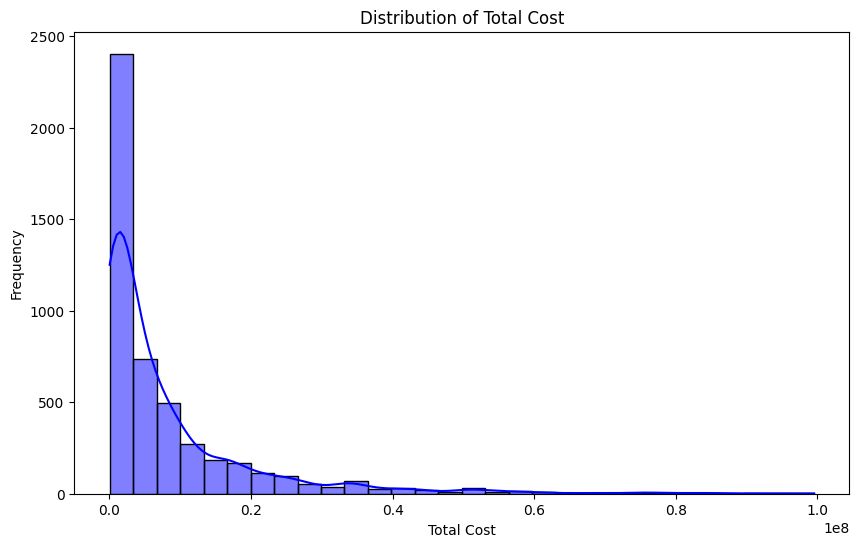

In [ ]:

# Univariate Analysis: Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Train['total_cost'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


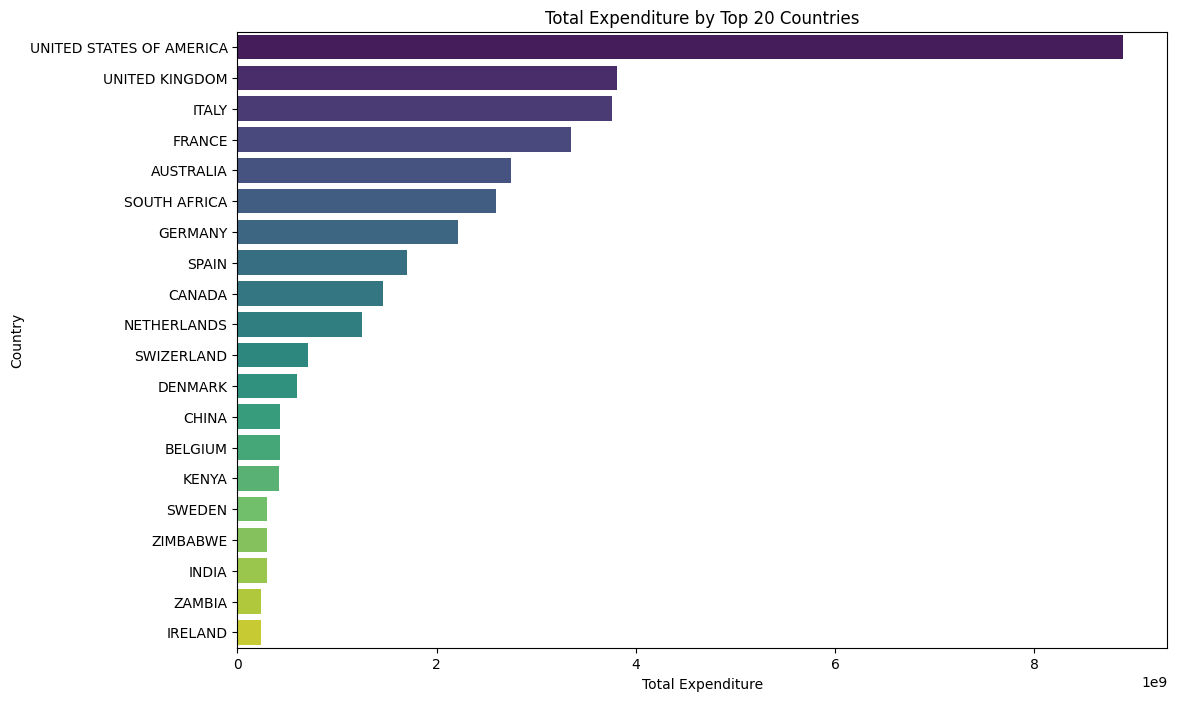

In [ ]:

# Calculate total expenditure for each country
total_expenditure_by_country = Train.groupby('country')['total_cost'].sum().sort_values(ascending=False)

# Select top 20 countries
top_20_countries = total_expenditure_by_country.head(20)

# Plot total expenditure for top 20 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_countries.values, y=top_20_countries.index, palette='viridis')
plt.title('Total Expenditure by Top 20 Countries')
plt.xlabel('Total Expenditure')
plt.ylabel('Country')
plt.show()



A visual representation of the total expenditure by the top 20 countries, allowing us to identify which countries contribute the most to tourism expenditure in Tanzania.

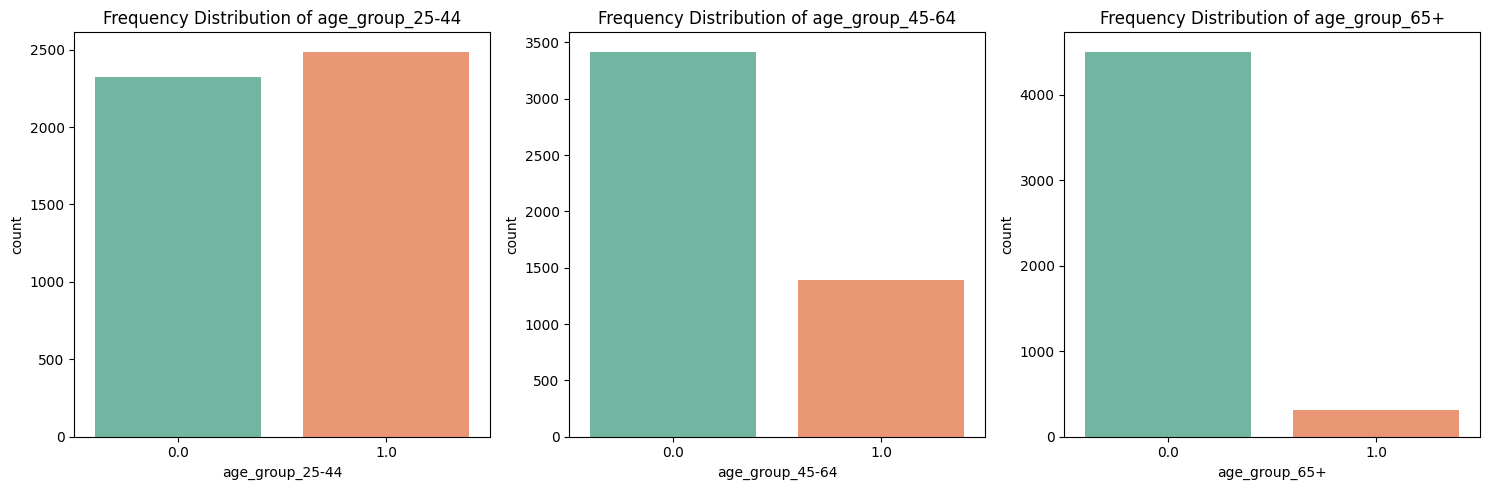

In [ ]:

# Categorical features for analysis
categorical_features = ['age_group_25-44', 'age_group_45-64', 'age_group_65+']

# Plot frequency distribution of each categorical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(1, 3, i)
    sns.countplot(data=Train, x=feature, palette='Set2')
    plt.title(f'Frequency Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
# Check column names in the Train DataFrame
print(Train.columns)



Index(['ID', 'country', 'total_female', 'total_male', 'night_mainland',
       'night_zanzibar', 'total_cost', 'age_group_25-44', 'age_group_45-64',
       'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'travel_with_Unknown',
       'purpose_Leisure and Holidays', 'purpose_Meetings and Conference',
       'purpose_Other', 'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'i

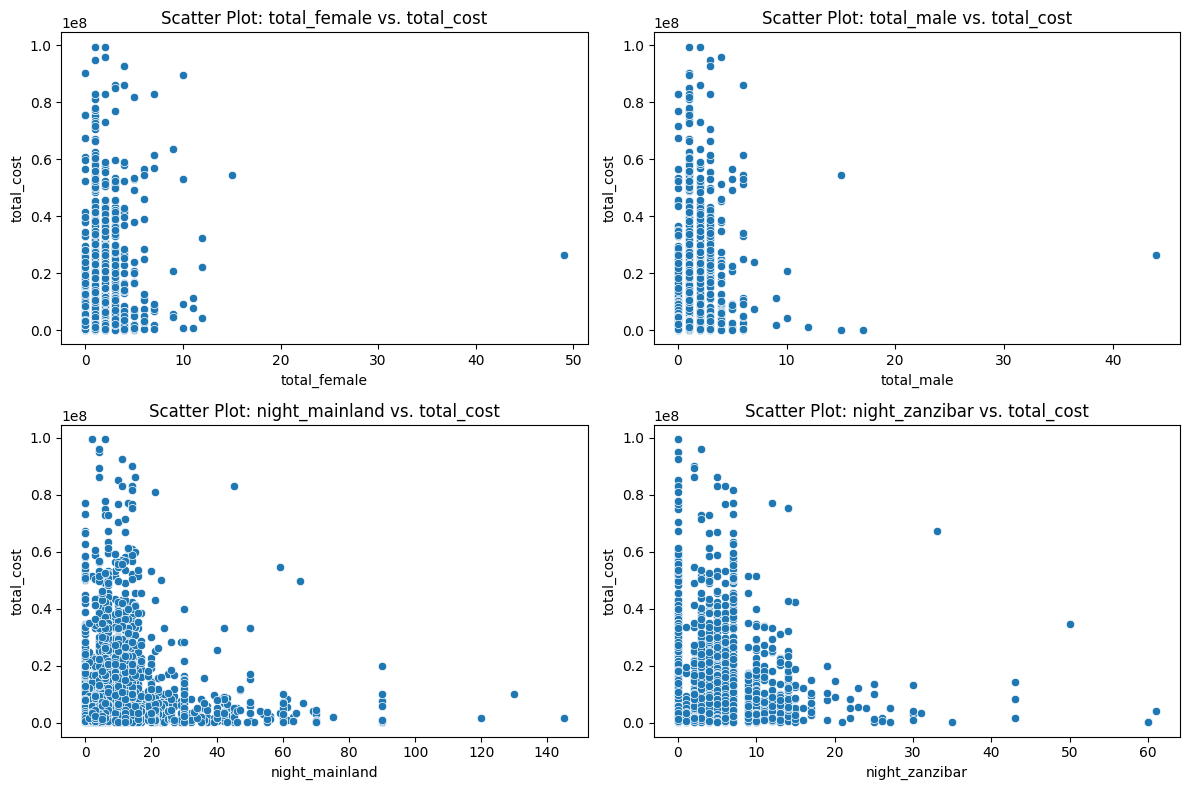

In [ ]:


# Select numerical features (excluding 'total_cost')
numerical_features = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']

# Create scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=Train, x=feature, y='total_cost')
    plt.title(f'Scatter Plot: {feature} vs. total_cost')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate correlation coefficients
correlation = Train[numerical_features + ['total_cost']].corr()

print("Correlation Coefficients:")
print(correlation['total_cost'])



Correlation Coefficients:
total_female      0.286058
total_male        0.184657
night_mainland    0.020473
night_zanzibar    0.145139
total_cost        1.000000
Name: total_cost, dtype: float64



#Interpreting the correlation coefficients:

total_female: There is a moderate positive correlation (0.286058) between the total number of female tourists and the total cost of the trip.
total_male: There is a weak positive correlation (0.184657) between the total number of male tourists and the total cost of the trip.
night_mainland: There is a very weak positive correlation (0.020473) between the number of nights spent on the mainland and the total cost of the trip.
night_zanzibar: There is a weak positive correlation (0.145139) between the number of nights spent in Zanzibar and the total cost of the trip.
These correlation coefficients suggest that the total number of female tourists has the strongest positive linear relationship with the total cost of the trip, followed by the total number of male tourists. The number of nights spent on the mainland and in Zanzibar show weaker positive correlations with the total cost of the trip

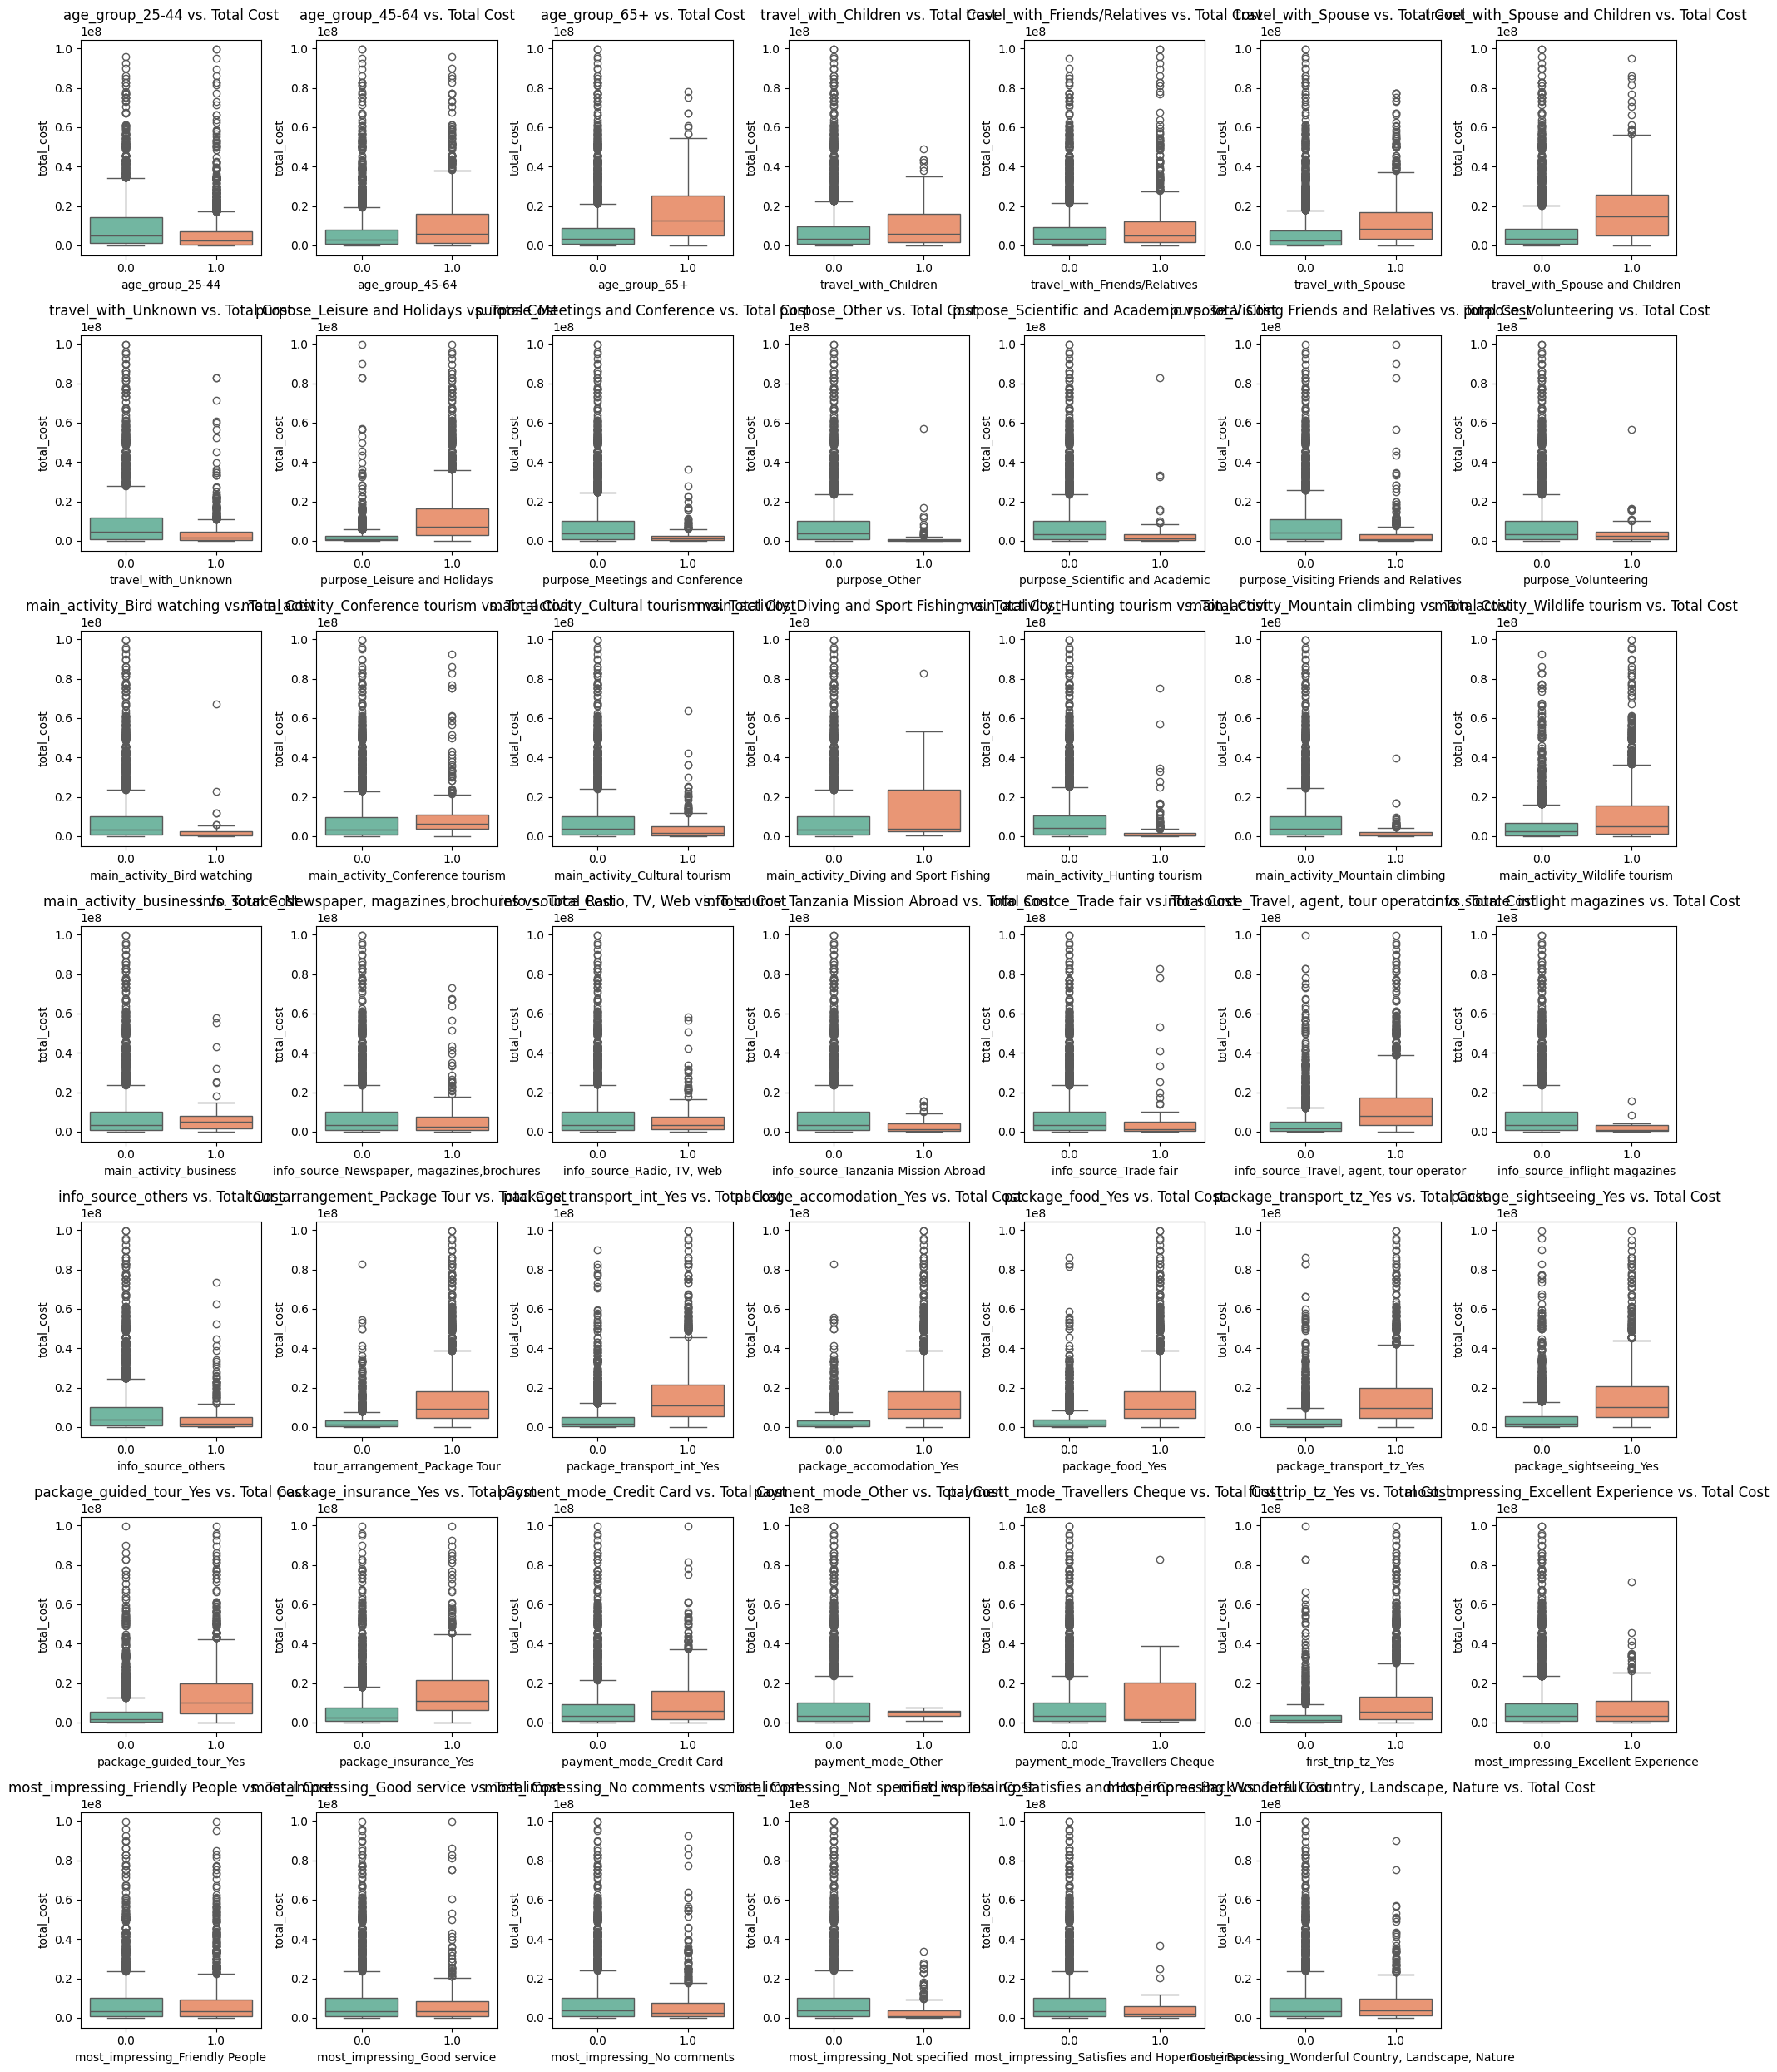

In [ ]:
# Define the categorical features
categorical_features = ['age_group_25-44', 'age_group_45-64', 'age_group_65+',
                        'travel_with_Children', 'travel_with_Friends/Relatives',
                        'travel_with_Spouse', 'travel_with_Spouse and Children',
                        'travel_with_Unknown', 'purpose_Leisure and Holidays',
                        'purpose_Meetings and Conference', 'purpose_Other',
                        'purpose_Scientific and Academic',
                        'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
                        'main_activity_Bird watching', 'main_activity_Conference tourism',
                        'main_activity_Cultural tourism',
                        'main_activity_Diving and Sport Fishing',
                        'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
                        'main_activity_Wildlife tourism', 'main_activity_business',
                        'info_source_Newspaper, magazines,brochures',
                        'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
                        'info_source_Trade fair', 'info_source_Travel, agent, tour operator',
                        'info_source_inflight magazines', 'info_source_others',
                        'tour_arrangement_Package Tour', 'package_transport_int_Yes',
                        'package_accomodation_Yes', 'package_food_Yes',
                        'package_transport_tz_Yes', 'package_sightseeing_Yes',
                        'package_guided_tour_Yes', 'package_insurance_Yes',
                        'payment_mode_Credit Card', 'payment_mode_Other',
                        'payment_mode_Travellers Cheque', 'first_trip_tz_Yes',
                        'most_impressing_Excellent Experience',
                        'most_impressing_Friendly People', 'most_impressing_Good service',
                        'most_impressing_No comments', 'most_impressing_Not specified',
                        'most_impressing_Satisfies and Hope Come Back',
                        'most_impressing_Wonderful Country, Landscape, Nature']

# Plot box plots for each categorical feature
plt.figure(figsize=(20, 25))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(7, 7, i)
    sns.boxplot(data=Train, x=feature, y='total_cost', palette='Set2')
    plt.title(f'{feature} vs. Total Cost')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()




#Age Group (age_group_25-44, age_group_45-64, age_group_65+):

Each age group category is plotted against the total cost.
The box plot shows the distribution of total costs for each age group.
You can see if there are differences in total costs between different age groups.
Travel With (travel_with_Children, travel_with_Friends/Relatives, travel_with_Spouse, etc.):

These features represent who the tourists are traveling with.
The box plots show how total costs vary based on who the tourists are traveling with.
For example, you can observe if tourists traveling with friends or relatives tend to spend more or less compared to other groups.
Purpose of Visit (purpose_Leisure and Holidays, purpose_Meetings and Conference, purpose_Visiting Friends and Relatives, etc.):

These features indicate the purpose of the tourists' visit.
The box plots display how total costs differ based on the purpose of the visit.
You can analyze if certain purposes lead to higher or lower total costs.
Main Activity (main_activity_Bird watching, main_activity_Cultural tourism, main_activity_Wildlife tourism, etc.):

These features describe the main activities of the tourists during their visit.
The box plots illustrate the relationship between different activities and total costs.
You can identify which activities are associated with higher or lower total costs.
Information Source (info_source_Newspaper, magazines,brochures, info_source_Radio, TV, Web, etc.):

These features indicate where the tourists obtained information about their travel destination.
The box plots show how total costs vary depending on the information source.
You can assess if certain information sources are linked to higher or lower total costs.
Others (tour_arrangement_Package Tour, package_transport_int_Yes, package_accomodation_Yes, etc.):

These features include various aspects of the tourists' travel arrangements and packages.
The box plots demonstrate how different arrangements and packages affect total costs.
You can examine if specific arrangements or package options are associated with higher or lower total costs.

In [ ]:



# Selecting only the numerical columns for correlation analysis
numerical_features = Train[['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']]

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                total_female  total_male  night_mainland  night_zanzibar  \
total_female        1.000000    0.466985        0.031205        0.138541   
total_male          0.466985    1.000000       -0.041957        0.050315   
night_mainland      0.031205   -0.041957        1.000000       -0.118155   
night_zanzibar      0.138541    0.050315       -0.118155        1.000000   
total_cost          0.286058    0.184657        0.020473        0.145139   

                total_cost  
total_female      0.286058  
total_male        0.184657  
night_mainland    0.020473  
night_zanzibar    0.145139  
total_cost        1.000000  



total_female vs. total_cost: There is a positive correlation of approximately 0.286 between the total number of female tourists and the total cost of the tour packages. This indicates that as the number of female tourists increases, the total cost tends to increase as well, but the correlation is not very strong.

total_male vs. total_cost: Similarly, there is a positive correlation of around 0.185 between the total number of male tourists and the total cost. Again, the correlation is not very strong, but it suggests that higher numbers of male tourists may be associated with higher total costs.

night_mainland vs. total_cost: There is a very weak positive correlation of about 0.020 between the number of nights spent on the mainland and the total cost. This suggests that the duration of stay on the mainland may have a slight influence on the total cost, but the correlation is almost negligible.

night_zanzibar vs. total_cost: There is a positive correlation of approximately 0.145 between the number of nights spent in Zanzibar and the total cost. This indicates that longer stays in Zanzibar tend to be associated with higher total costs, but again, the correlation is not very strong.

Overall, among the numerical features, the total number of female tourists has the strongest positive correlation with the total cost, followed by the number of nights spent in Zanzibar. However, none of the correlations are exceptionally strong, suggesting that other factors may also play significant roles in determining the total cost of tour packages.

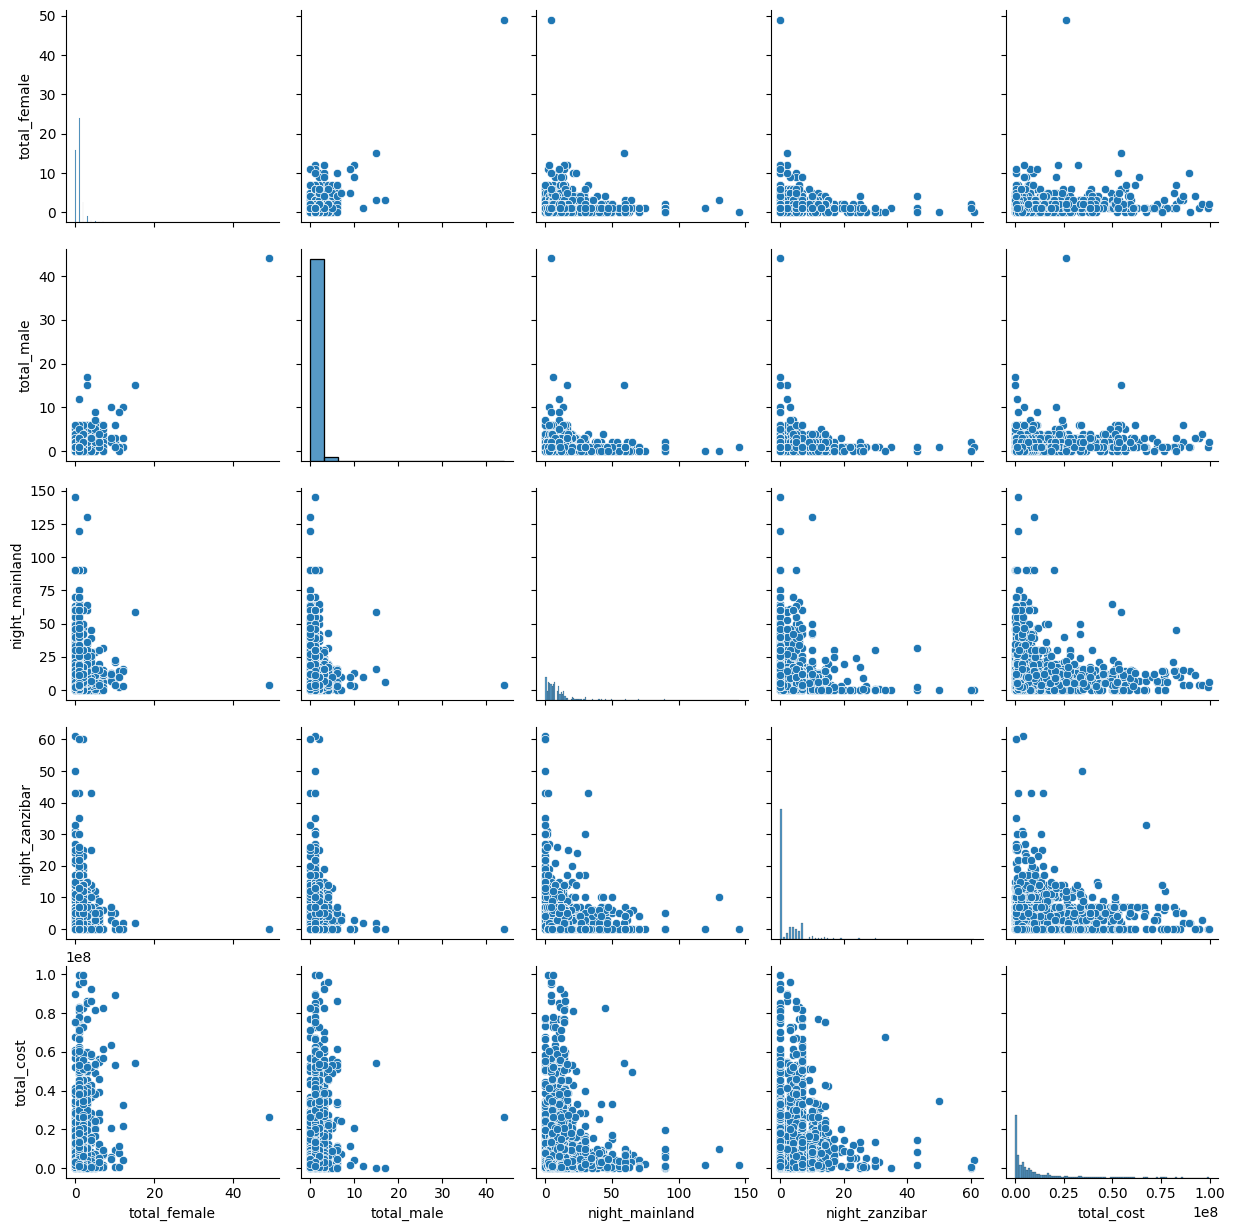

In [ ]:

# Selecting numerical features for pairplot
numerical_features = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

# Creating pairplot
sns.pairplot(data=Train[numerical_features])
plt.show()



Main Diagonal: Along the main diagonal of the grid, histograms of each numerical feature are displayed. These histograms show the distribution of values for each feature individually.

Off-diagonal Scatterplots: In the off-diagonal cells of the grid, scatterplots are shown for pairs of numerical features. Each point in the scatterplot represents an observation in the dataset, with the x-coordinate representing one numerical feature and the y-coordinate representing another. These scatterplots allow us to visually inspect the relationship between pairs of numerical features.

By examining the scatterplots, we can look for patterns or trends that indicate how the numerical features are related to each other and to the target variable (total_cost). For example:

Positive correlation: If the points in the scatterplot tend to form an upward sloping pattern, it suggests a positive correlation between the two numerical features.
Negative correlation: Conversely, if the points form a downward sloping pattern, it indicates a negative correlation.
No correlation: If the points appear randomly scattered without any discernible pattern, it suggests no correlation between the two features.

In [ ]:

# Combine gender features to create a new feature representing total tourists
Train['total_tourists'] = Train['total_female'] + Train['total_male']

# Drop the individual gender columns
Train.drop(['total_female', 'total_male'], axis=1, inplace=True)


# TOTAL female+male=total_tourists.

Combining gender into a single feature could simplify the model and reduce dimensionality, especially THAT there's strong correlation or interaction between total_female and total_male.
>Identifying highly correlated features is important because they can introduce multicollinearity issues in predictive models. In this case, total_female and total_male are highly correlated, which means including both of them in a predictive model might not provide much additional information and could potentially lead to instability in the model estimates


In [ ]:

# Combine gender features to create a new feature representing total tourists
Test['total_tourists'] = Test['total_female'] + Train['total_male']

# Drop the individual gender columns
Test.drop(['total_female', 'total_male'], axis=1, inplace=True)



In [ ]:

from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = ['night_mainland', 'night_zanzibar']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
Train_scaled = Train.copy()
Train_scaled[numerical_features] = scaler.fit_transform(Train[numerical_features])


In [ ]:

import pandas as pd

# Assuming 'Train' is your DataFrame containing numerical features
numerical_columns = Train.select_dtypes(include=['number']).columns
skewness = Train[numerical_columns].skew()

# Display skewness for each numerical feature
print("Skewness for each numerical feature:")
print(skewness)


Skewness for each numerical feature:
night_mainland                                           4.026044
night_zanzibar                                           4.226719
total_cost                                               2.967848
age_group_25-44                                         -0.068683
age_group_45-64                                          0.929907
age_group_65+                                            3.569403
travel_with_Children                                     5.170757
travel_with_Friends/Relatives                            1.613529
travel_with_Spouse                                       1.431974
travel_with_Spouse and Children                          3.187026
travel_with_Unknown                                      1.272547
purpose_Leisure and Holidays                            -0.368444
purpose_Meetings and Conference                          3.534209
purpose_Other                                            5.883813
purpose_Scientific and Academic        

In [ ]:

from sklearn.preprocessing import StandardScaler

# Encode categorical variables
categorical_features = Train.select_dtypes(include=['object'])
# Perform one-hot encoding or label encoding for categorical features

# Separate numerical features
numerical_features = Train.select_dtypes(include=['float64', 'int64'])

# Apply skewness correction to numerical features
skewness_before = numerical_features.skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to reduce skewness
numerical_features_log = np.log1p(numerical_features)

# Apply StandardScaler to standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_log)

# Convert back to DataFrame
Train_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Rejoin numerical and categorical features
Train_processed = pd.concat([Train_scaled, categorical_features], axis=1)

# Check skewness after transformation
skewness_after = Train_scaled.skew()
print("Skewness after logarithmic transformation:")
print(skewness_after)



>The reduction in skewness suggests that the logarithmic transformation has helped to make the distributions of these features more symmetric and closer to a normal distribution.

In [ ]:


from sklearn.preprocessing import StandardScaler

# Encode categorical variables
categorical_features = Test.select_dtypes(include=['object'])
# Perform one-hot encoding or label encoding for categorical features

# Separate numerical features
numerical_features = Test.select_dtypes(include=['float64', 'int64'])

# Apply skewness correction to numerical features
skewness_before = numerical_features.skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to reduce skewness
numerical_features_log = np.log1p(numerical_features)

# Apply StandardScaler to standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_log)

# Convert back to DataFrame
Test_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Rejoin numerical and categorical features
Test_processed = pd.concat([Test_scaled, categorical_features], axis=1)

# Check skewness after transformation
skewness_after = Test_scaled.skew()
print("Skewness after logarithmic transformation:")
print(skewness_after)



Skewness Before Transformation:

Features like night_mainland, night_zanzibar, main_activity_Diving and Sport Fishing, payment_mode_Travellers Cheque, etc., have high positive skewness values, indicating a heavy right tail in their distributions.
Skewed distributions suggest that there may be outliers or a non-normal distribution of data in these features.

Skewness After Logarithmic Transformation:

>After applying the logarithmic transformation, the skewness of most features reduced.
Features like night_mainland, night_zanzibar, main_activity_Diving and Sport Fishing, payment_mode_Travellers Cheque, etc., still have relatively notable skewness values, but they have been notably reduced compared to their initial skewness values.
Some features, such as total_tourists, even show negative skewness after the transformation, indicating a slight left tail in their distributions.


The reduction in skewness suggests that the logarithmic transformation has helped to make the distributions of these features more symmetric and closer to a normal distribution.






In [ ]:

print(Test_processed.shape)

(1601, 53)


In [ ]:
# Save the processed data to a new csv file
Test_processed.to_csv('Test_processed.csv', index=False)

In [ ]:
print(Train_processed.head())

   night_mainland  night_zanzibar  total_cost  age_group_25-44  \
0        0.783358       -0.751059   -0.797316        -1.034920   
1        0.828744        1.463757    0.143678         0.966258   
2       -1.065596        2.195667    0.161221         0.966258   
3        0.678763       -0.751059    0.637031         0.966258   
4        0.379859        1.137636   -0.243821        -1.034920   

   age_group_45-64  age_group_65+  travel_with_Children  \
0         1.567554      -0.261136             -0.186712   
1        -0.637937      -0.261136             -0.186712   
2        -0.637937      -0.261136             -0.186712   
3        -0.637937      -0.261136             -0.186712   
4        -0.637937      -0.261136             -0.186712   

   travel_with_Friends/Relatives  travel_with_Spouse  \
0                       2.091216           -0.514000   
1                      -0.478191           -0.514000   
2                      -0.478191           -0.514000   
3                      -

In [ ]:
# Check the shape of the processed data
print("Shape of the processed data:", Train_processed.shape)

Shape of the processed data: (4809, 54)


In [ ]:

# Check the data types of the processed data
print("Data types of the processed data:")
print(Train_processed.dtypes)


Data types of the processed data:
night_mainland                                          float64
night_zanzibar                                          float64
total_cost                                              float64
age_group_25-44                                         float64
age_group_45-64                                         float64
age_group_65+                                           float64
travel_with_Children                                    float64
travel_with_Friends/Relatives                           float64
travel_with_Spouse                                      float64
travel_with_Spouse and Children                         float64
travel_with_Unknown                                     float64
purpose_Leisure and Holidays                            float64
purpose_Meetings and Conference                         float64
purpose_Other                                           float64
purpose_Scientific and Academic                         float64
purpos

In [ ]:

# Check for missing values in the processed data
print("Missing values in the processed data:")
print(Train_processed.isnull().sum())


Missing values in the processed data:
night_mainland                                          0
night_zanzibar                                          0
total_cost                                              0
age_group_25-44                                         0
age_group_45-64                                         0
age_group_65+                                           0
travel_with_Children                                    0
travel_with_Friends/Relatives                           0
travel_with_Spouse                                      0
travel_with_Spouse and Children                         0
travel_with_Unknown                                     0
purpose_Leisure and Holidays                            0
purpose_Meetings and Conference                         0
purpose_Other                                           0
purpose_Scientific and Academic                         0
purpose_Visiting Friends and Relatives                  0
purpose_Volunteering              

In [ ]:
#loaad data to a new csv file
Train_processed.to_csv('Train_processed.csv', index=False)


#WHY USE RMSE:

1.Easy Interpretation: RMSE is in the same unit as the target variable (total cost), making it easy to interpret. It represents the average magnitude of the errors between predicted and actual values.

2.Sensitivity to Large Errors: RMSE penalizes large prediction errors more heavily than mean absolute error (MAE).

>It provides a measure of the average magnitude of errors produced by the model in its predictions.
It penalizes large errors more than smaller ones, providing 
a more accurate representation of prediction accuracy.

>RMSE is sensitive to outliers, which makes it suitable for 
evaluating models when the target variable has skewed 
distributions.


3.Differentiability: RMSE is differentiable, which is beneficial for optimization algorithms used during model training.

4.Commonly Used: RMSE is a widely accepted and understood metric, making it easier to compare models and communicate results.

In [ ]:






# Load the Train dataset
train_data = pd.read_csv("Train_processed.csv")

# Separate features (X) and target variable (y) from the Train dataset
X_train = train_data.drop(columns=['ID', 'country', 'total_cost'])
y_train = train_data['total_cost']

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Initialize and train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Initialize and train a Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

# Evaluate models on the validation set
linear_reg_preds = linear_reg_model.predict(X_val)
rf_reg_preds = rf_reg_model.predict(X_val)

# Calculate evaluation metrics (Root Mean Squared Error)
linear_reg_rmse = mean_squared_error(y_val, linear_reg_preds, squared=False)
rf_reg_rmse = mean_squared_error(y_val, rf_reg_preds, squared=False)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest Regression RMSE:", rf_reg_rmse)


Linear Regression RMSE: 0.70563444574515
Random Forest Regression RMSE: 0.716507787550229



Interpretation:

Linear Regression RMSE: The RMSE of approximately 0.7056 suggests that, on average, the predictions made by the linear regression model are off by around 0.7056 units from the actual values of the target variable (total cost). Lower RMSE values indicate better performance, so a lower RMSE for the linear regression model suggests that it's providing more accurate predictions compared to the Random Forest model in this case.

>Overall, based on the RMSE values provided, the linear regression model appears to outperform the Random Forest regression model in terms of prediction accuracy.

In [ ]:

from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluate the model
decision_tree_rmse = np.sqrt(mean_squared_error(y_val, decision_tree_model.predict(X_val)))
print("Decision Tree Regression RMSE:", decision_tree_rmse)


Decision Tree Regression RMSE: 0.995364812191835


In [ ]:

from sklearn.neighbors import KNeighborsRegressor

# Initialize and train KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_model.predict(X_val)))
print("KNN Regression RMSE:", knn_rmse)


KNN Regression RMSE: 0.7819249862611408


In [ ]:




# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Initialize grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search to training data
grid_search_knn.fit(X_train, y_train)

# Get best parameters and best model
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

# Evaluate best KNN model on validation set
knn_preds_tuned = best_knn_model.predict(X_val)
knn_rmse_tuned = np.sqrt(mean_squared_error(y_val, knn_preds_tuned))

print("Best parameters for KNN:", best_params_knn)
print("Tuned KNN RMSE:", knn_rmse_tuned)


Best parameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Tuned KNN RMSE: 0.7340600559341339



Algorithm: 'kd_tree'

This parameter specifies the algorithm used to compute the nearest neighbors. 'kd_tree' is one of the algorithms available in scikit-learn for this purpose.
Leaf Size: 30

The leaf size parameter is the number of points at which the algorithm switches to brute-force search. A smaller leaf size may speed up the construction of the tree but could lead to slower query times.
Number of Neighbors: 11

This parameter defines the number of neighbors to use for each query point. In this case, the optimal number of neighbors is determined to be 11.
P: 1

The 'p' parameter is the power parameter for the Minkowski metric. When p = 1, it corresponds to using the Manhattan distance (L1 norm).
Weights: 'uniform'

This parameter determines the weight function used in prediction. 'uniform' indicates that all points in each neighborhood are weighted equally.
The tuned KNN model with these hyperparameters achieves a Root Mean Squared Error (RMSE) of approximately 0.734 on the validation set. This indicates that, on average, the model's predictions deviate from the actual values by about 0.734 units. Lower RMSE values indicate better model performance, so the tuned KNN model seems to provide reasonable predictions on the validation data.

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regression
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)

# Initialize grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search to training data
grid_search_rf.fit(X_train, y_train)

# Get best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Evaluate best Random Forest model on validation set
rf_reg_preds_tuned = best_rf_model.predict(X_val)
rf_reg_rmse_tuned = mean_squared_error(y_val, rf_reg_preds_tuned, squared=False)

print("Best parameters for Random Forest:", best_params_rf)
print("Tuned Random Forest Regression RMSE:", rf_reg_rmse_tuned)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Regression RMSE: 0.6782319283465482


In [ ]:


# Load the Test data
#Test_data = pd.read_csv("Test_processed.csv")

# Create new feature 'total_tourists'
#Test_data['total_tourists'] = Test_data['total_female'] + Test_data['total_male']

# Drop 'ID', 'country', 'total_female', and 'total_male' columns
#Test_data.drop(columns=['ID', 'country', 'total_female', 'total_male'], inplace=True)





In [ ]:

# Make predictions using the tuned Random Forest model
rf_test_preds = best_rf_model.predict(Test_processed)
print(rf_test_preds)

[ 0.89636032 -0.3654617   0.31826742 ... -0.85240189 -0.98408452
  0.36936618]


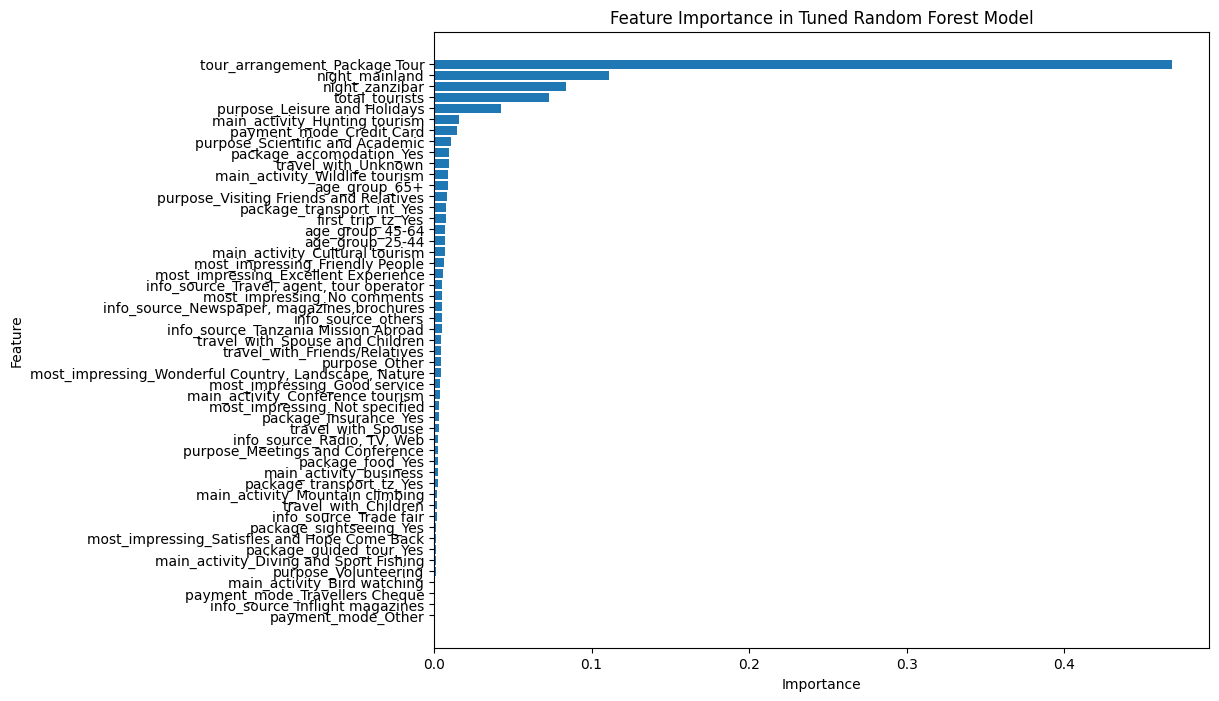

In [ ]:

# Extract feature importances from the tuned RF model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Tuned Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


#
W